In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
brainFrame = pd.read_csv('brainsize.txt')

In [4]:
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


In [6]:
brainFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     40 non-null     object 
 1   FSIQ       40 non-null     int64  
 2   VIQ        40 non-null     int64  
 3   PIQ        40 non-null     int64  
 4   Weight     38 non-null     float64
 5   Height     39 non-null     float64
 6   MRI_Count  40 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 2.3+ KB


In [9]:
brainFrame.isna().sum()

Gender       0
FSIQ         0
VIQ          0
PIQ          0
Weight       2
Height       1
MRI_Count    0
dtype: int64

In [84]:
brainFrame.groupby('Gender').Gender.value_counts()

Gender
Female    20
Male      20
Name: count, dtype: int64

In [5]:
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


---

В первую очередь сравним показатели, исходя из пола.

In [89]:
brainFrame.groupby('Gender', as_index=False).agg({'FSIQ':'mean', 
                                                  'VIQ':'mean', 
                                                  'PIQ':'mean', 
                                                  'MRI_Count':'mean'
                                                  })	

,Gender,FSIQ,VIQ,PIQ,MRI_Count
0,Female,111.9,109.45,110.45,862654.6
1,Male,115.0,115.25,111.60,954855.4


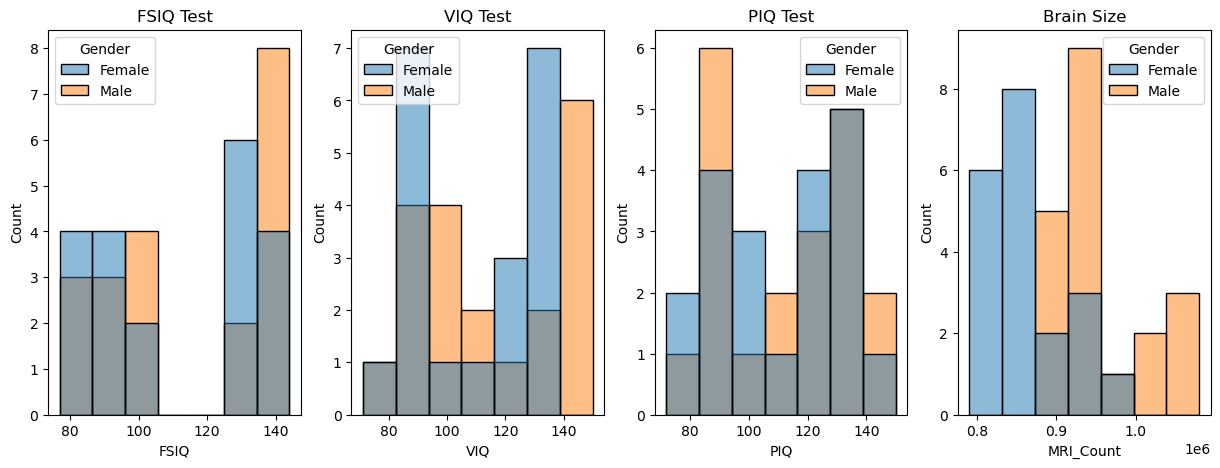

In [78]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
sns.histplot(data=brainFrame, x='FSIQ', hue='Gender')
plt.title('FSIQ Test')
plt.subplot(1, 4, 2)
sns.histplot(data=brainFrame, x='VIQ', hue='Gender')
plt.title('VIQ Test')
plt.subplot(1, 4, 3)
sns.histplot(data=brainFrame, x='PIQ', hue='Gender')
plt.title('PIQ Test')
plt.subplot(1, 4, 4)
sns.histplot(data=brainFrame, x='MRI_Count', hue='Gender')
plt.title('Brain Size');

---

Постороим диаграммы рассеиваний, чтобы проверить природу связи между размером мозга и результатами измерения интеллекта.

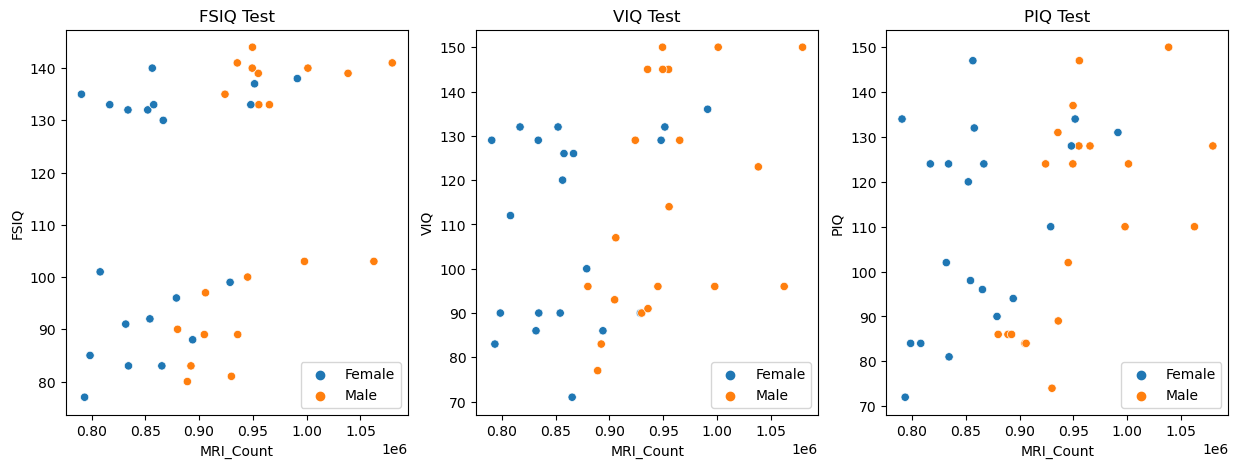

In [81]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x="MRI_Count", y="FSIQ", data=brainFrame, hue='Gender')
plt.legend(loc='lower right')
plt.title('FSIQ Test')
plt.subplot(1, 3, 2)
sns.scatterplot(x="MRI_Count", y="VIQ", data=brainFrame, hue='Gender')
plt.legend(loc='lower right')
plt.title('VIQ Test')
plt.subplot(1, 3, 3)
sns.scatterplot(x="MRI_Count", y="PIQ", data=brainFrame, hue='Gender')
plt.legend(loc='lower right')
plt.title('PIQ Test');

Далее постром тепловую карту корреляции.

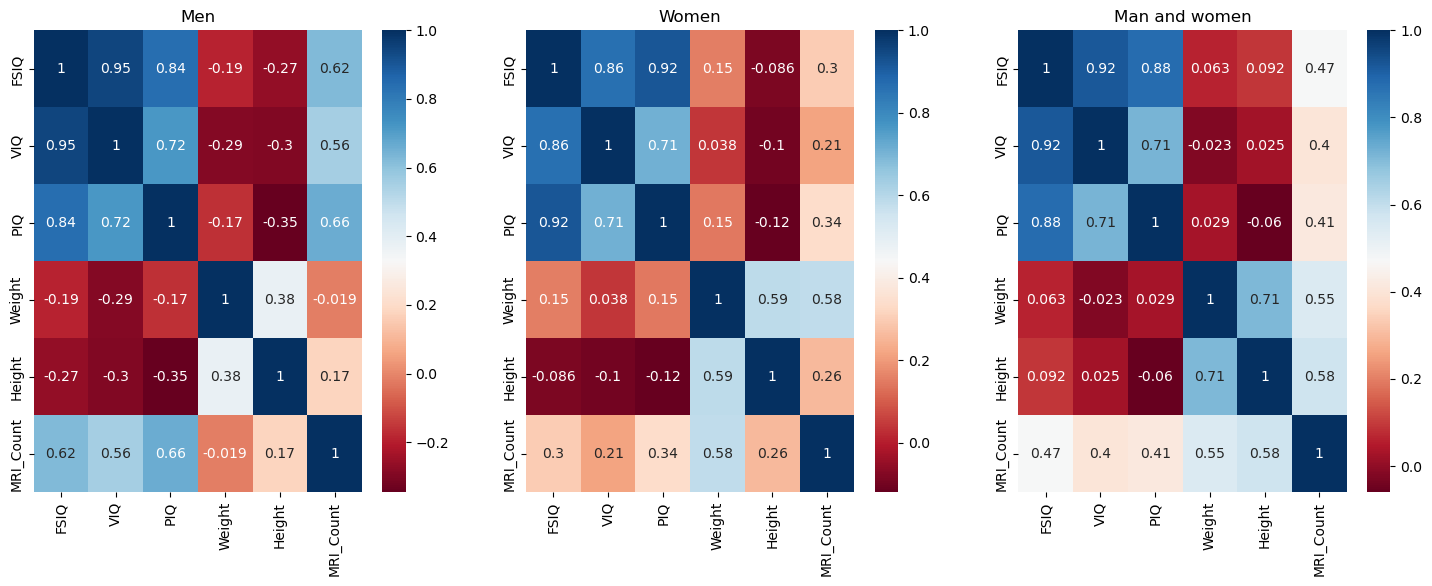

In [96]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.heatmap(brainFrame[(brainFrame.Gender == 'Male')]
            .select_dtypes(include=[np.number])
            .corr(method='spearman'), annot=True, cmap='RdBu'
            )
plt.title('Men')
plt.subplot(1, 3, 2)
sns.heatmap(brainFrame[(brainFrame.Gender == 'Female')]
            .select_dtypes(include=[np.number])
            .corr(method='spearman'), annot=True, cmap='RdBu'
            )
plt.title('Women')
plt.subplot(1, 3, 3)
sns.heatmap(brainFrame
            .select_dtypes(include=[np.number])
            .corr(method='spearman'), annot=True, cmap='RdBu'
            )
plt.title('Man and women');